# Diffraction des rayons X par le cristal de Sr₂NCl

### Raphaël Roekens 70732200

L'objectif de ce notebook est de déterminer les 3 premiers pics de diffraction pour le rayonnement X Cu Kα à partir de la base de données du Materials Project et de les analyser.

Le rayonnement Cu Kα correspond à une longueur d'onde obtenue lorsque, dans un atome de cuivre, des électrons de la couche n=2 (L) viennent combler une lacune dans la couche n=1 (K). Ils émettent alors dans ce processus des photons X d'une longueur d'onde λ = 1,54060 Å.

## 1. Importation

In [45]:
import numpy as np
import matplotlib as plt
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import *
from jupyter_jsmol.pymatgen import quick_view

In [46]:
mp_key ="iX81lxwugQ7QfGznstwLyMrndo3WUZbE"
mp_id = "mp-23033"

with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Pics de diffraction

La condition de Bragg nous donne les angles d'incidence du rayon X sur le réseau auxquels on peut observer un pic d'intensité. Cette condition provient d'une relation entre les vecteurs d'onde et les nœuds du réseau réciproque.

En effet, le vecteur d'onde incident doit satisfaire la condition suivante :
$$\bar{k} \cdot \hat{K} = \frac{1}{2}|\bar{K}|$$
<div style="text-align: right;"> avec $\bar{K} =\bar{k}-\bar{k}' $; $\bar{k}$, le vecteur d'onde incident et  $\bar{k}'$ le vecteur d'onde diffusée </div>

On peut en déduire la condition de Bragg :
$$ n\lambda = 2d\sin(\theta) $$

avec :

- $n$ $[-]$ : l'ordre de diffraction
- $\lambda$ $[\text{m}]$ : la longueur d'onde du faisceau incident
- $d = \frac{2\pi}{|\bar{v}|}$ $[\text{m}]$ : la distance entre les plans consécutifs du réseau direct, plus précisément notée $d_{hkl}$, faisant référence à la famille de plans (hkl) du réseau direct
- $\bar{v} = h \bar{a}^* + k\bar{b}^* + l\bar{c}^*$ $[\text{rad}\cdot\text{m}^{-1}]$ : le vecteur dans le réseau réciproque lié à la famille de plans (hkl)
- $\theta$ $[\text{rad}]$ : l'angle d'incidence entre le rayon X et le réseau direct



In [47]:
xrd = XRDCalculator(wavelength = 'CuKa1')
plan = xrd.get_pattern(conv_struc)
hkl = plan.hkls
d_hkl = plan.d_hkls

In [48]:
tableau = np.empty((3, 6), dtype=object)

for i in range(3):
    tableau[i] = [
        f"Pic {i + 1}", 
        round(plan.x[i], 3),  # 2θ en degrés
        round(plan.y[i], 3),  # Intensité normalisée
        str(hkl[i][0]['hkl']),  # Indices de Miller (h,k,l)
        hkl[i][0]['multiplicity'],  # Multiplicité
        round(d_hkl[i], 4)  # Distance inter-plans en Å
    ]

header = ["Pic", "2θ [°]", "Intensité [%]", "(h,k,i,l)", "multiplicité", "d_hkl [Å]"]
print(f"{header[0]:<10}{header[1]:<10}{header[2]:<15}{header[3]:<15}{header[4]:<15}{header[5]:<15}")
print("-" * 80)

for row in tableau:
    print(f"{row[0]:<10}{row[1]:<10}{row[2]:<15}{row[3]:<15}{row[4]:<15}{row[5]:<15}")

Pic       2θ [°]    Intensité [%]  (h,k,i,l)      multiplicité   d_hkl [Å]      
--------------------------------------------------------------------------------
Pic 1     12.565    11.484         (0, 0, 0, 3)   2              7.0388         
Pic 2     25.285    8.376          (0, 0, 0, 6)   2              3.5194         
Pic 3     26.754    7.005          (1, 0, -1, 1)  12             3.3293         


### Commentaire

Dans les systèmes cristallins hexagonaux ou rhomboédriques, il est courant d'utiliser la notation de Miller-Bravais, qui fait intervenir un quatrième indice, noté **i**. Cet indice est redondant, car il est lié aux trois premiers par la relation :

$$ h + k + i = 0 $$

Cette relation permet de faciliter la représentation des symétries spécifiques à ces structures cristallines.


## 3. Graphe

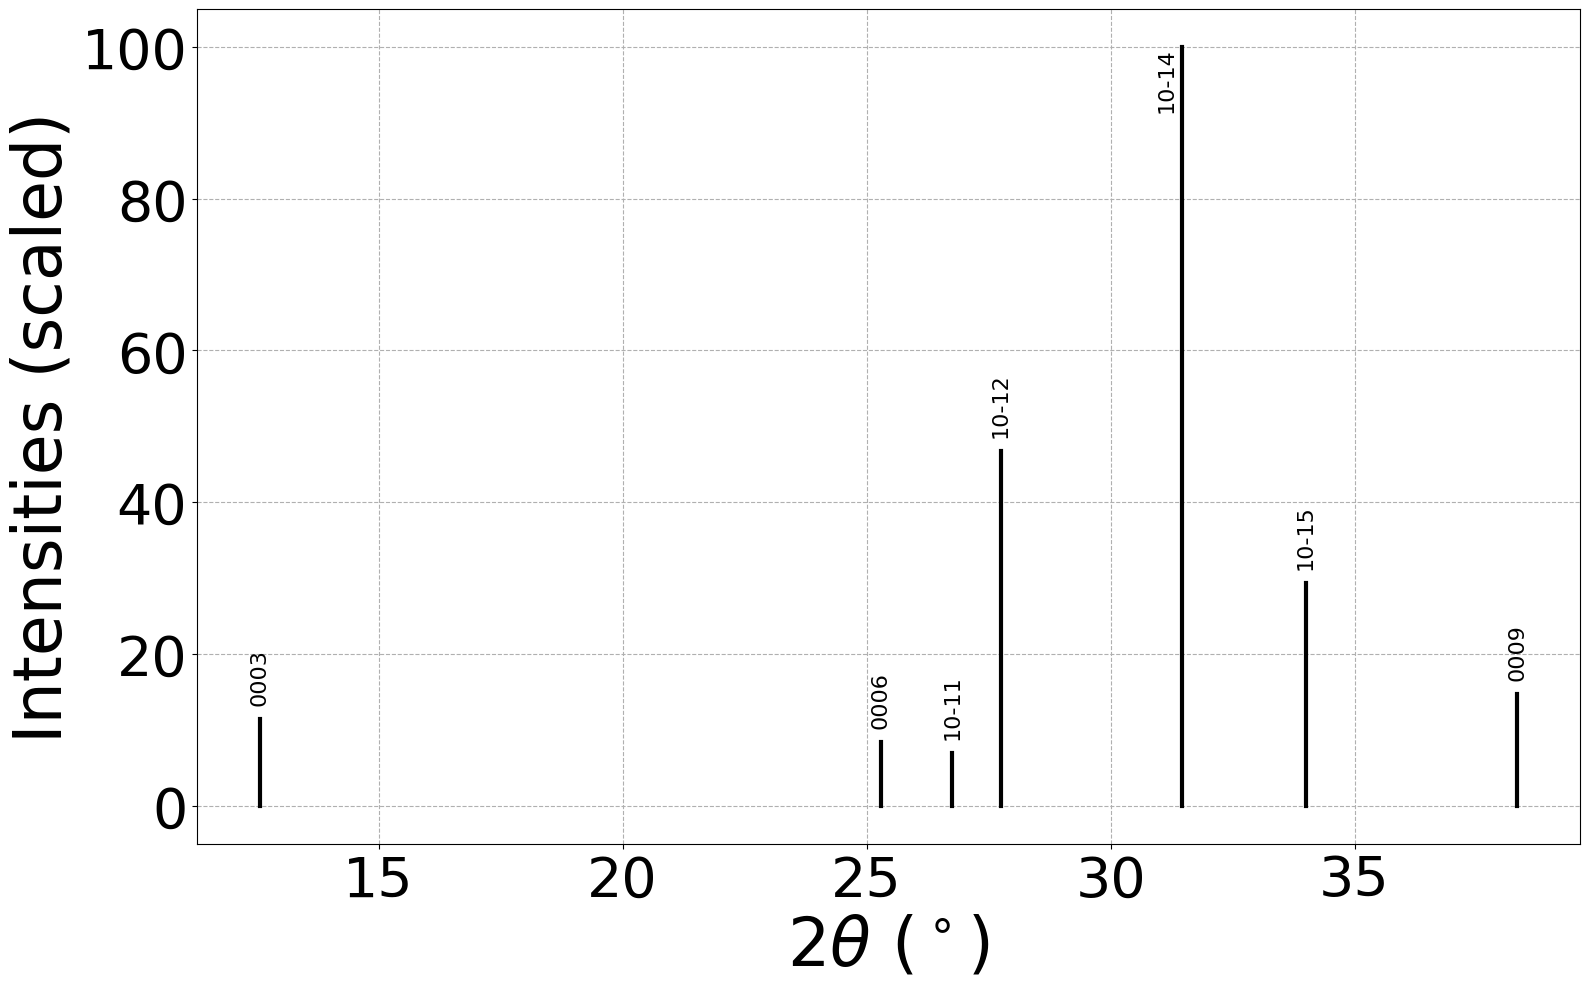

In [49]:
plt = xrd.get_plot(conv_struc,two_theta_range=(0,40))
plt.grid(True, linestyle='dashed')

## 4. Plans de diffraction

Chaque pics de diffraction est associé à une famille de plans parrallèles séparés d'une distance $d_{hkl}$. Ces plans peuvent donc être représentés dans le résau direct. 

### 4.1. Plans $(0 0 3)$ 

In [50]:
view = quick_view(conv_struc,"packed", conventional = True)
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [51]:
view.script('select strontium; color lightyellow')
view.script('select nitrogen; color lightgreen')
view.script('select chlorine; color lightblue')

view.script('isosurface id plan1 hkl 0 0 3  ; color $plan1 lightblue ;color $plan1 translucent 0.2')
view.script('isosurface id plan2 hkl 0 0 1.5; color $plan2 lightblue ;color $plan2 translucent 0.2')
view.script('isosurface id plan3 hkl 0 0 1000  ; color $plan3 lightblue;color $plan3 translucent 0.2')
view.script('isosurface id plan4 hkl 0 0 1  ; color $plan4 lightblue;color $plan4 translucent 0.2')

### 4.2. Plans $(0 0 6)$ 

In [52]:
view2 = quick_view(conv_struc,"packed", conventional = True)
display(view2)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [53]:
view2.script('select strontium; color lightyellow')
view2.script('select nitrogen; color lightgreen')
view2.script('select chlorine; color lightblue')

view2.script('isosurface id plan0 hkl 0 0 1000; color $plan0 lightblue ;color $plan0 translucent 0.2')
view2.script('isosurface id plan1 hkl 0 0 6  ; color $plan1 lightblue ;color $plan1 translucent 0.2')
view2.script('isosurface id plan2 hkl 0 0 3  ; color $plan2 lightblue ;color $plan2 translucent 0.2')
view2.script('isosurface id plan3 hkl 0 0 2  ; color $plan3 lightblue ;color $plan3 translucent 0.2')
view2.script('isosurface id plan4 hkl 0 0 1.5; color $plan4 lightblue ;color $plan4 translucent 0.2')
view2.script('isosurface id plan5 hkl 0 0 1.2; color $plan5 lightblue ;color $plan5 translucent 0.2')
view2.script('isosurface id plan6 hkl 0 0 1  ; color $plan6 lightblue ;color $plan6 translucent 0.2')


#### Commentaire

On remarque que la famille de plans $(006)$ contient la famille $(003)$. Des plans supplémentaires contenant des atomes d'Azote interviennent aussi dans la diffusion. De même que pour le pic $(009)$ qui lui contient la famille $(003)$ et des plans d'atomes de Strontium.

L'intensité des pics varie selon l'angle mais aussi selon le type d'atome qui diffuse et sa position dans la maille : 

$$ I \sim |S_{\bar{K}}|^2 = |\sum_{j=1}^{N}f_j(\bar{K}) e^{i\bar{K}\cdot{\bar{r_j}}} |^2 $$

<div style="text-align: right;"> avec $f_j$ le facteur de forme de l'atome qui donne l'intensité relative diffusé par un atome isolé</div>

### 4.3. Plans $(1 0 1)$ 

In [54]:
view3 = quick_view(conv_struc,"packed", conventional = True)
display(view3)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [55]:
view3.script('select strontium; color lightyellow')
view3.script('select nitrogen; color lightgreen')
view3.script('select chlorine; color lightblue')
view3.script('draw plan1 300 plane (0 0 0) color blue')

view3.script('isosurface id plan1 hkl 1 0 1      ; color $plan1 lightblue ;color $plan1 translucent 0.3')
view3.script('isosurface id plan2 hkl 1000 0 1000; color $plan2 lightblue ;color $plan2 translucent 0.3')
view3.script('isosurface id plan2 hkl 1000 0 1000; color $plan2 lightblue ;color $plan2 translucent 0.3')
view3.script('isosurface id plan3 hkl 0.5 0 0.5; color $plan3 lightblue ;color $plan3 translucent 0.3')